In [1]:
from sqlalchemy import create_engine
from os import environ
import pandas as pd
import matplotlib

In [2]:
# Create the database engine
db_uri = environ.get('SQLALCHEMY_SALES_URI')
engine = create_engine(db_uri)

In [3]:
# Read the "salesperson" table in the connected database
salespeople_df = pd.read_sql_table("salesperson", con=engine)

In [4]:
# Read the "salesperson" table in the connected database with some additional parameters
specifics_salespeople_df = pd.read_sql_table("salesperson", 
                                             con=engine, 
                                             index_col='id', 
                                             coerce_float=True, 
                                             columns=['id','city', 'state'], 
                                             parse_dates=['dateCol'], 
                                             chunksize=250)

In [5]:
# Query for the email addresses from the "salesperson" table and show 10 of them
email_df = pd.read_sql("SELECT email_address FROM salesperson LIMIT 10", con=engine)

In [6]:
# Count the values of the "state" column in the "salesperson" table 
salespeople_df['state'].value_counts()

Texas             9
Minnesota         4
Florida           4
Virginia          3
California        3
Ohio              3
Alabama           2
Kansas            2
Washington        2
Indiana           2
Oklahoma          2
Tennessee         2
North Carolina    1
Colorado          1
Utah              1
Michigan          1
New Hampshire     1
New York          1
Illinois          1
Kentucky          1
Arizona           1
Massachusetts     1
New Mexico        1
Connecticut       1
Name: state, dtype: int64

<AxesSubplot: >

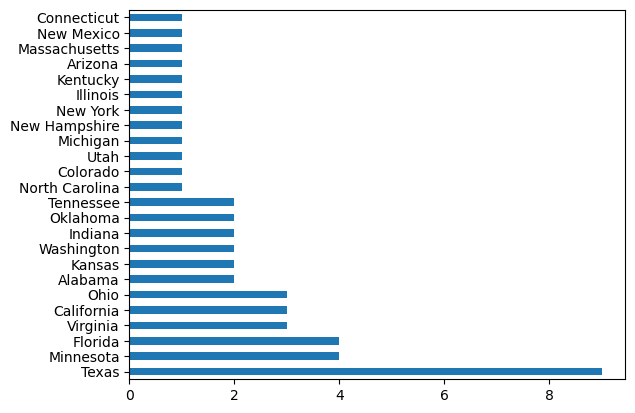

In [7]:
# Plot a bar chart of the "state" column
salespeople_df['state'].value_counts().plot(kind='barh')